In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Test DFT and IDFT

We take a simple signal $f$ and we apply a Discrete Fourier Transform (**DFT**) to retrieve its frequencies. We then use the Inverse Discrete Fourier Transform (**IDFT**) to recompose the signal from its frequencies.

## The signal

In [2]:
# Arguments
P = 10 # period of the signal

freq = 1/P # The smallest frequency in the signal f
Freq = [freq*i for i in np.arange(0, 11)] # the list of frequencies that compose the signal

def f(t):
    s = 0
    for freq_i in Freq:
        s = s + 2*np.sin(2*np.pi*t*freq_i)
    return s

The frequencies that exist in the signal are the following :

In [3]:
print("The frequencies that exist in the signal are: ")
print(Freq)

The frequencies that exist in the signal are: 
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]


In [4]:
# Arguments
dt = .1 # sample spacing (distance between two adjacent samples)

N = 5*int(P/dt) # sample size (N is the number the positive frequencies)
N2 = 2*N

T = np.linspace(0, N2*dt, N2) # The time sample
x = f(T) # The signal sample

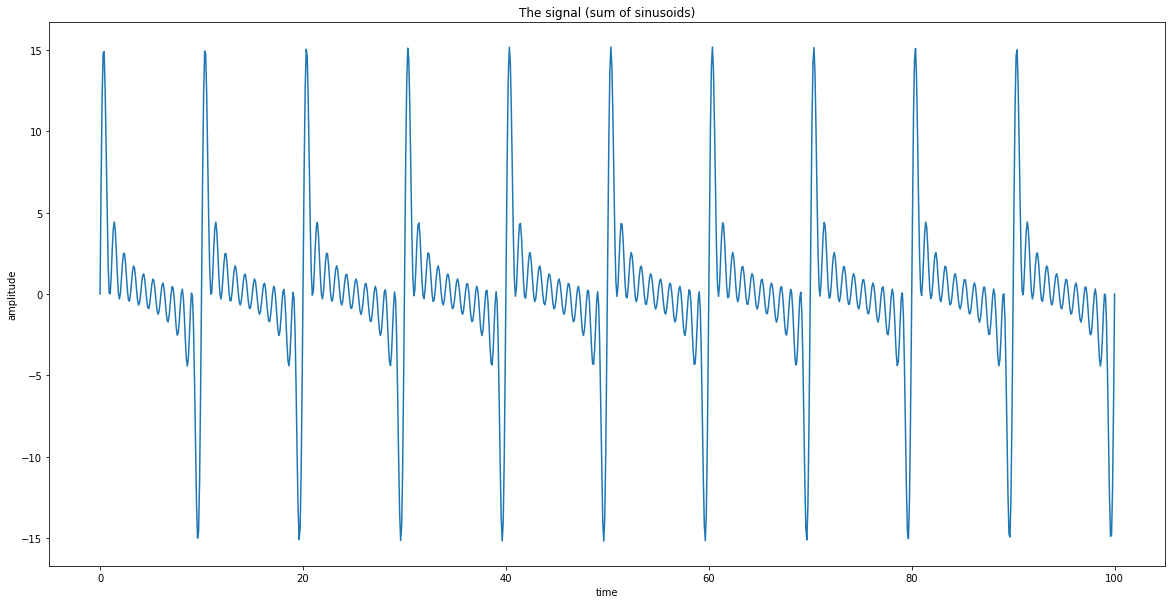

In [5]:
plt.figure(figsize = (20, 10))
plt.title("The signal (sum of sinusoids)")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(T, x)

## DFT

We use the DFT to get the amplitudes associated to the frequencies.

**Remark**:
a normalization is necessary before getting the true amplitudes, which we do not do.

In [6]:
X_noshift = np.fft.fft(x) # The amplitudes
X = np.fft.fftshift(X_noshift) # The reordered amplitudes
X_half = X[N:] # The amplitudes of the positive frequencies
Xi = np.fft.fftshift( np.fft.fftfreq(N2, dt) ) # The frequencies sample 
Xi_half = Xi[N:] # The frequencies sample (only positive ones)

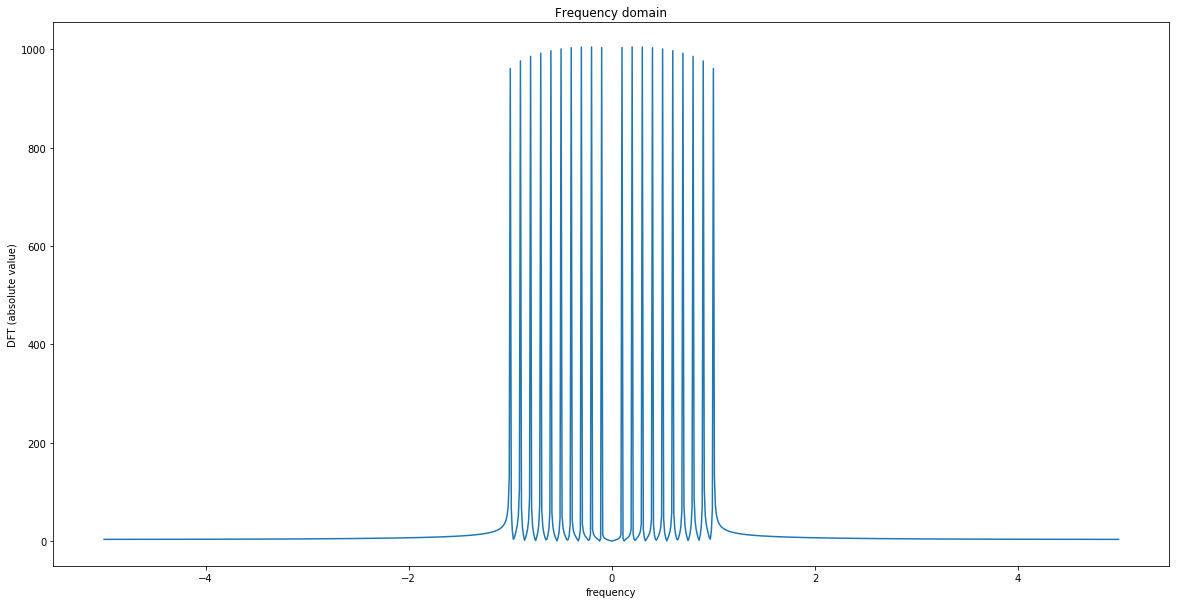

In [7]:
plt.figure(figsize = (20, 10))
plt.title("Frequency domain")
plt.xlabel("frequency")
plt.ylabel("DFT (absolute value)")
plt.plot(Xi, np.abs(X))

NameError: name 'plot_signals' is not defined

We check that the peaks correspond to the frequencies of the signal:

In [10]:
# Argument
lower_bound = 100

mask = (np.abs(X_half) > lower_bound) # The indices where the absolute value of the DFT is larger than the set lower bound
print("Frequencies for which the DFT is larger that ", str(lower_bound), " : ")
print(Xi[mask]) 
print("Frequencies of the signal :")
print(Freq)

Frequencies for which the DFT is larger that  100  : 
[-1.01 -1.   -0.91 -0.9  -0.8  -0.7  -0.6  -0.5  -0.4  -0.3  -0.2  -0.1
  0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   0.91  1.    1.01]
Frequencies of the signal :
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]


## IDFT

From the amplitudes/values of the DFT we can recover the signal using the IDFT.

In [11]:
recovered_x = np.fft.ifft(X_noshift) # IDFT
error = np.abs(recovered_x.real - x) # we also compute the error between the original signal and the one returned by the IDFT

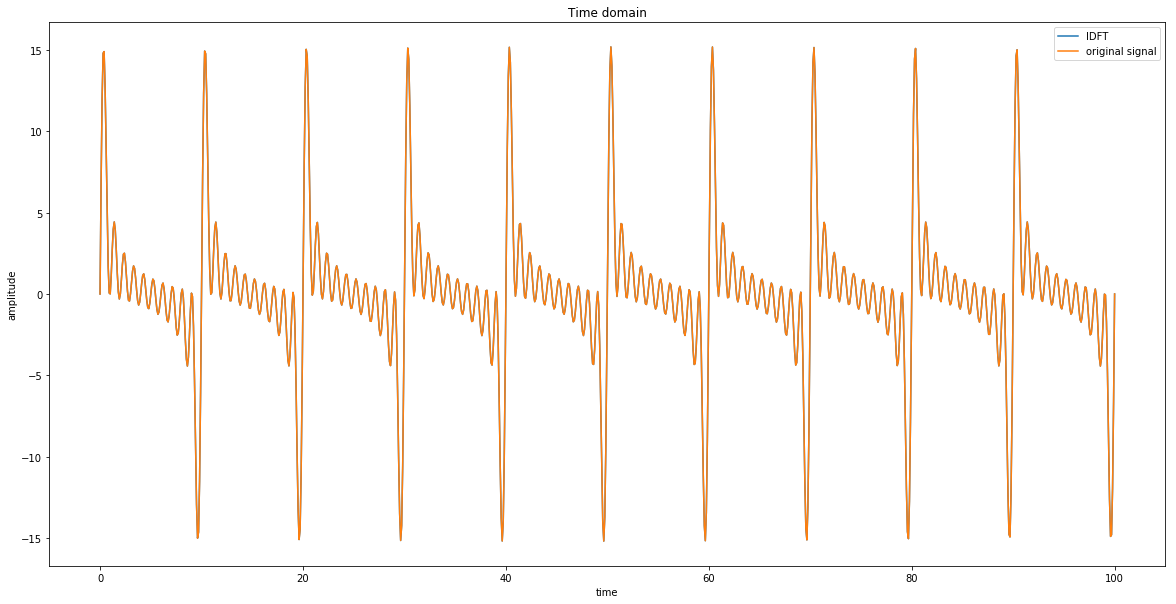

In [12]:
plt.figure( figsize = (20, 10) )
plt.plot(T, recovered_x.real, label = "IDFT")
plt.plot(T, x, label = "original signal")
plt.title("Time domain")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()

Maximum value of the error :  7.105427357601002e-15


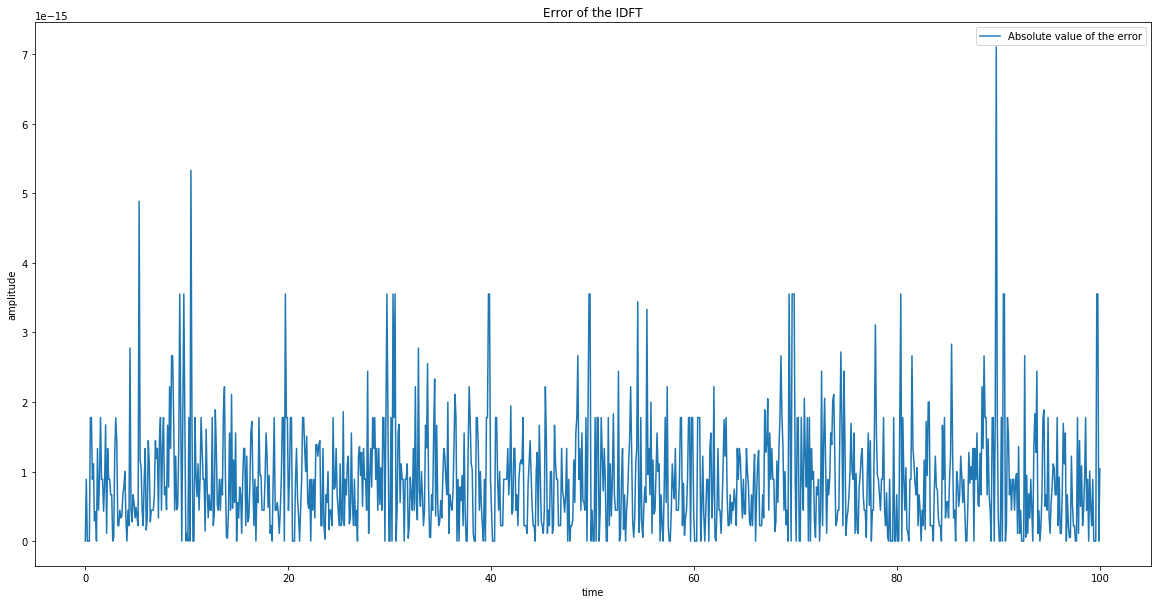

In [13]:
plt.figure( figsize = (20, 10) )
plt.plot(T, error, label = "Absolute value of the error")
plt.title("Error of the IDFT")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()
print("Maximum value of the error : ", np.amax(error))

## rfft instead of the fft

Here we test the `rfft` function of `numpy.fft`, compared to the `fft` function. We notice that the `rfft` is straightforward operation for real signals ( no operation required on the indices of the arrays) . 

In [14]:
X_rfft = np.fft.rfft(x)
Xi_rfft = np.fft.rfftfreq(N2, dt)
x_recovered_rfft = np.fft.irfft(X_rfft)

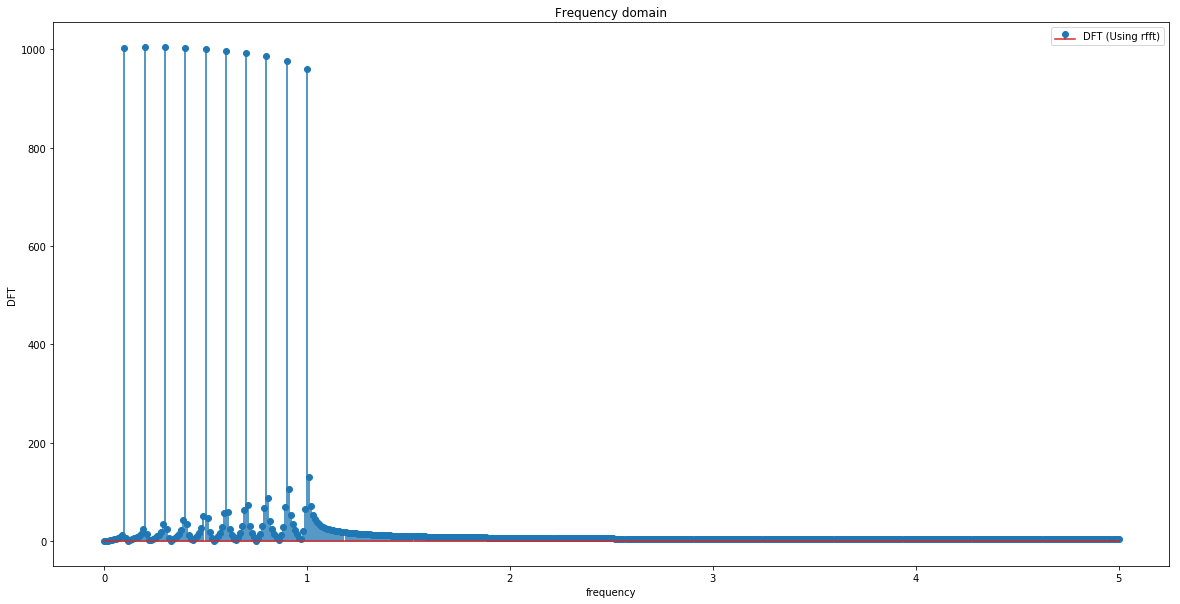

In [15]:
plt.figure( figsize = (20, 10) )
plt.stem(Xi_rfft, abs(X_rfft), label = "DFT (Using rfft)")
plt.title("Frequency domain")
plt.xlabel("frequency")
plt.ylabel("DFT")
plt.legend()

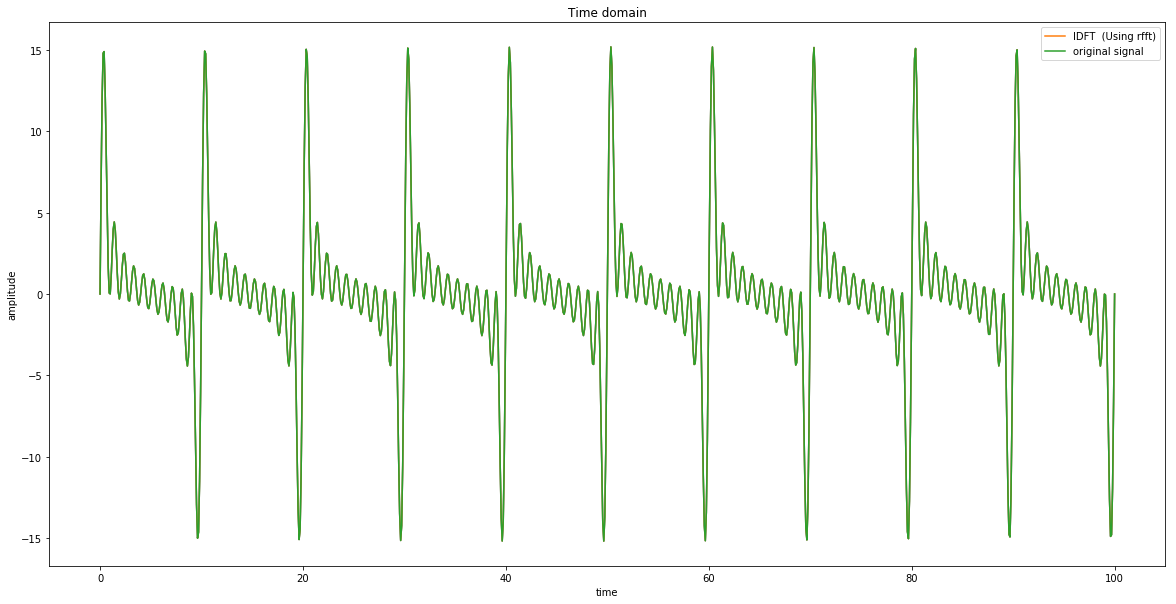

In [16]:
plt.figure( figsize = (20, 10) )
plt.plot(T, x_recovered_rfft)
plt.plot(T, recovered_x.real, label = "IDFT  (Using rfft)")
plt.plot(T, x, label = "original signal")
plt.title("Time domain")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()